# Algoritmos de optimización - Reto 1

Nombre: Guillermo Rios Gómez <br>
Github: <br>

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import time

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [14]:
# Torres de Hanoi

# Torres de Hanoi con Divide y Vencerás
# Algoritmo basado en la técnica de divide y vencerás.
# Divide el problema en mover una torre más pequeña a una torre auxiliar, mover el disco mayor, 
# y luego trasladar la torre pequeña desde la auxiliar a la torre final.


def hanoi_solver(levels, start_pillar, mid_pillar, end_pillar, moves=None):
    if moves is None:
        moves = []  # Reiniciar la lista de movimientos en cada llamada principal
    if levels == 1:
        moves.append((start_pillar, end_pillar))
    else:
        hanoi_solver(levels - 1, start_pillar, end_pillar, mid_pillar, moves)
        moves.append((start_pillar, end_pillar))
        hanoi_solver(levels - 1, mid_pillar, start_pillar, end_pillar, moves)
    return moves

# Visualización mejorada de los movimientos
def hanoi_visualizer(levels, moves):
    towers = {"Alpha": list(range(levels, 0, -1)), "Beta": [], "Gamma": []}

    def show_towers():
        output = ""
        for tower in towers:
            output += f"{tower}: {towers[tower]}\n"
        output += "-" * 20 + "\n"
        return output

    # Concatenar toda la salida
    output = "Estado inicial:\n" + show_towers()

    for start, end in moves:
        if not towers[start]:  # Verificar que la torre no esté vacía antes de hacer pop
            raise ValueError(f"La torre {start} está vacía, pero se intentó mover un disco.")
        disk = towers[start].pop()
        towers[end].append(disk)
        output += f"Mover disco de {start} a {end}:\n" + show_towers()

    # Mostrar la salida completa como Markdown
    display(Markdown(f"```\n{output}\n```"))

# Pruebas para Torres de Hanoi
try:
    hanoi_moves_3 = hanoi_solver(3, "Alpha", "Beta", "Gamma")
    print("Prueba con 3 discos:")
    hanoi_visualizer(3, hanoi_moves_3)

    hanoi_moves_4 = hanoi_solver(4, "Alpha", "Beta", "Gamma")
    print("Prueba con 4 discos:")
    hanoi_visualizer(4, hanoi_moves_4)
except ValueError as e:
    print(f"Error: {e}")

Prueba con 3 discos:


```
Estado inicial:
Alpha: [3, 2, 1]
Beta: []
Gamma: []
--------------------
Mover disco de Alpha a Gamma:
Alpha: [3, 2]
Beta: []
Gamma: [1]
--------------------
Mover disco de Alpha a Beta:
Alpha: [3]
Beta: [2]
Gamma: [1]
--------------------
Mover disco de Gamma a Beta:
Alpha: [3]
Beta: [2, 1]
Gamma: []
--------------------
Mover disco de Alpha a Gamma:
Alpha: []
Beta: [2, 1]
Gamma: [3]
--------------------
Mover disco de Beta a Alpha:
Alpha: [1]
Beta: [2]
Gamma: [3]
--------------------
Mover disco de Beta a Gamma:
Alpha: [1]
Beta: []
Gamma: [3, 2]
--------------------
Mover disco de Alpha a Gamma:
Alpha: []
Beta: []
Gamma: [3, 2, 1]
--------------------

```

Prueba con 4 discos:


```
Estado inicial:
Alpha: [4, 3, 2, 1]
Beta: []
Gamma: []
--------------------
Mover disco de Alpha a Beta:
Alpha: [4, 3, 2]
Beta: [1]
Gamma: []
--------------------
Mover disco de Alpha a Gamma:
Alpha: [4, 3]
Beta: [1]
Gamma: [2]
--------------------
Mover disco de Beta a Gamma:
Alpha: [4, 3]
Beta: []
Gamma: [2, 1]
--------------------
Mover disco de Alpha a Beta:
Alpha: [4]
Beta: [3]
Gamma: [2, 1]
--------------------
Mover disco de Gamma a Alpha:
Alpha: [4, 1]
Beta: [3]
Gamma: [2]
--------------------
Mover disco de Gamma a Beta:
Alpha: [4, 1]
Beta: [3, 2]
Gamma: []
--------------------
Mover disco de Alpha a Beta:
Alpha: [4]
Beta: [3, 2, 1]
Gamma: []
--------------------
Mover disco de Alpha a Gamma:
Alpha: []
Beta: [3, 2, 1]
Gamma: [4]
--------------------
Mover disco de Beta a Gamma:
Alpha: []
Beta: [3, 2]
Gamma: [4, 1]
--------------------
Mover disco de Beta a Alpha:
Alpha: [2]
Beta: [3]
Gamma: [4, 1]
--------------------
Mover disco de Gamma a Alpha:
Alpha: [2, 1]
Beta: [3]
Gamma: [4]
--------------------
Mover disco de Beta a Gamma:
Alpha: [2, 1]
Beta: []
Gamma: [4, 3]
--------------------
Mover disco de Alpha a Beta:
Alpha: [2]
Beta: [1]
Gamma: [4, 3]
--------------------
Mover disco de Alpha a Gamma:
Alpha: []
Beta: [1]
Gamma: [4, 3, 2]
--------------------
Mover disco de Beta a Gamma:
Alpha: []
Beta: []
Gamma: [4, 3, 2, 1]
--------------------

```

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

Fibonacci recursivo para n=5: 5
Fibonacci recursivo para n=10: 55
Fibonacci iterativo para n=5: [0, 1, 1, 2, 3, 5]
Fibonacci iterativo para n=10: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


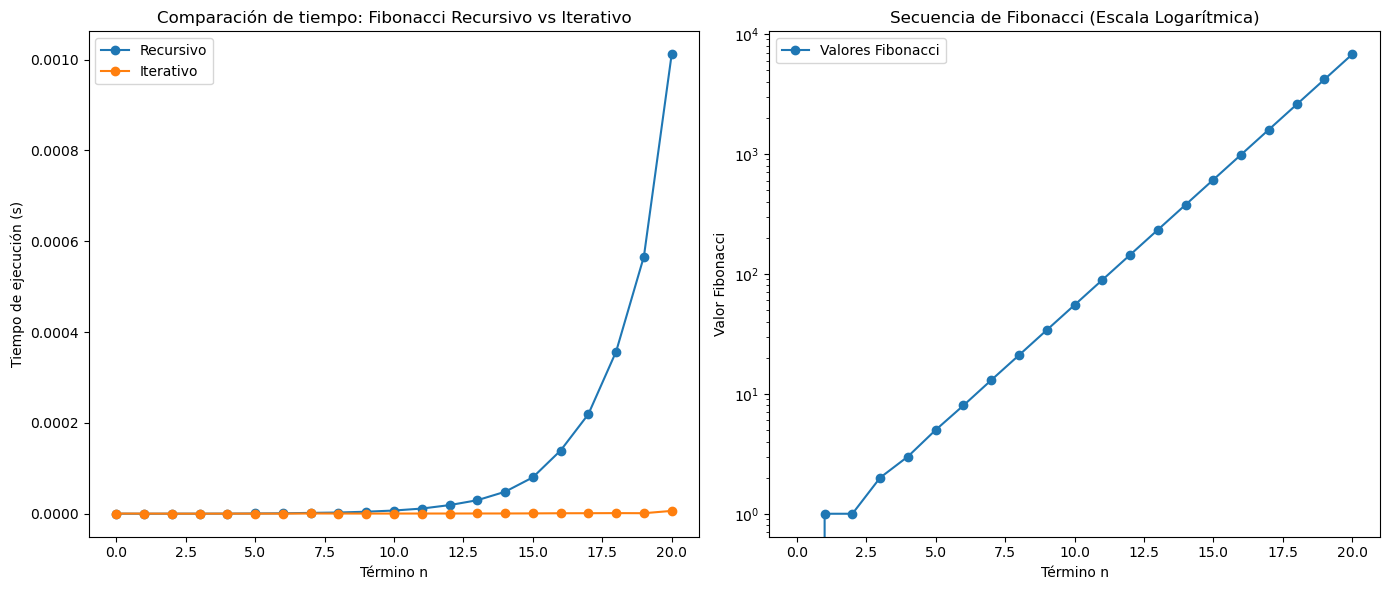

In [15]:
#Sucesión_de_Fibonacci

# Algoritmo que utiliza tanto la técnica recursiva como la iterativa para comparar sus resultados y eficiencia.
# La técnica recursiva sigue la definición matemática, pero es ineficiente debido a cálculos repetidos.
# La técnica iterativa utiliza una secuencia de valores acumulativos para optimizar el cálculo.

def recursive_fibo(target):
    if target <= 1:
        return target
    return recursive_fibo(target - 1) + recursive_fibo(target - 2)

def iterative_fibo(target):
    first, second = 0, 1
    sequence = [first]
    for _ in range(target):
        first, second = second, first + second
        sequence.append(first)
    return sequence

# Pruebas para Fibonacci
print("Fibonacci recursivo para n=5:", recursive_fibo(5))
print("Fibonacci recursivo para n=10:", recursive_fibo(10))
print("Fibonacci iterativo para n=5:", iterative_fibo(5))
print("Fibonacci iterativo para n=10:", iterative_fibo(10))

def fibo_visualizer(max_target):
    values = list(range(max_target + 1))
    iterative_sequence = iterative_fibo(max_target)

    recursive_times = []
    iterative_times = []

    for target in values:
        if target <= 30:  # Limitar recursivo para evitar tiempos excesivos
            start = time.perf_counter()
            recursive_fibo(target)
            recursive_times.append(time.perf_counter() - start)
        else:
            recursive_times.append(None)

        start = time.perf_counter()
        iterative_fibo(target)
        iterative_times.append(time.perf_counter() - start)

    # Graficar tiempos de ejecución
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(values[:31], recursive_times[:31], label="Recursivo", marker="o")
    plt.plot(values, iterative_times, label="Iterativo", marker="o")
    plt.xlabel("Término n")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.legend()
    plt.title("Comparación de tiempo: Fibonacci Recursivo vs Iterativo")

    # Graficar secuencia de Fibonacci
    plt.subplot(1, 2, 2)
    plt.plot(values, iterative_sequence, marker="o", label="Valores Fibonacci")
    plt.xlabel("Término n")
    plt.ylabel("Valor Fibonacci")
    plt.yscale("log")  # Escala logarítmica para manejar valores grandes
    plt.title("Secuencia de Fibonacci (Escala Logarítmica)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar para valores mayores
fibo_visualizer(20)

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

Prueba con cantidad 87 y monedas [1, 5, 10, 25, 50]:


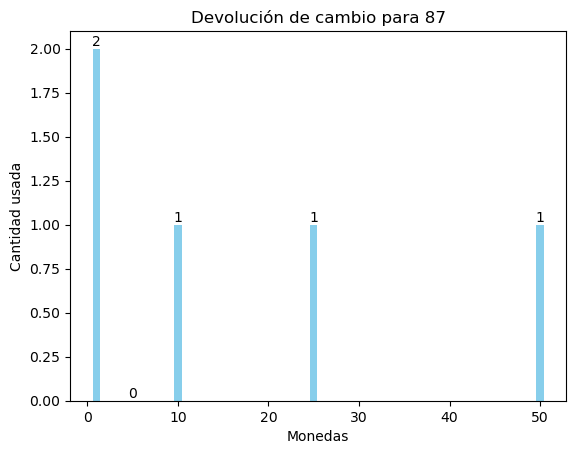

Prueba con cantidad 49 y monedas [1, 7, 10, 20]:


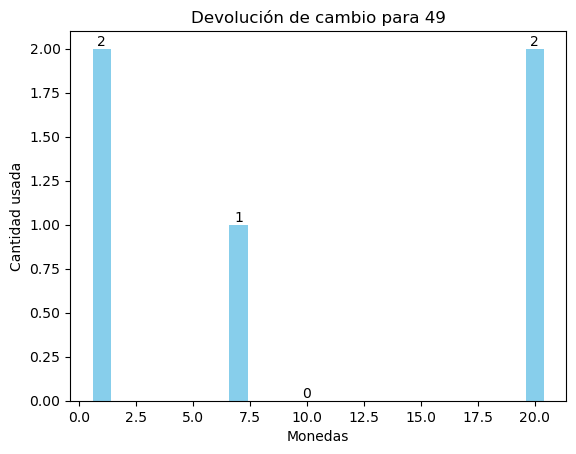

In [16]:
# Problema del cambio de moneda

# Devolución de cambio por técnica voraz
# Algoritmo voraz que elige la moneda de mayor denominación disponible en cada paso.
# Es eficiente, pero no siempre garantiza el cambio óptimo si el sistema de monedas no es canónico.

def greedy_change(amount, coins):
    solution = []
    for coin in sorted(coins, reverse=True):
        while amount >= coin:
            amount -= coin
            solution.append(coin)
    if amount != 0:
        print("No se puede devolver el cambio exacto con las monedas disponibles.")
    return solution

def change_visualizer(amount, coins):
    solution = greedy_change(amount, coins)
    count = {coin: solution.count(coin) for coin in coins}

    plt.bar(count.keys(), count.values(), color="skyblue")
    plt.xlabel("Monedas")
    plt.ylabel("Cantidad usada")
    plt.title(f"Devolución de cambio para {amount}")

    for coin, quantity in count.items():
        plt.text(coin, quantity, str(quantity), ha="center", va="bottom", fontsize=10)

    plt.show()

# Pruebas para devolución de cambio
print("Prueba con cantidad 87 y monedas [1, 5, 10, 25, 50]:")
change_visualizer(87, [1, 5, 10, 25, 50])

print("Prueba con cantidad 49 y monedas [1, 7, 10, 20]:")
change_visualizer(49, [1, 7, 10, 20])

## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

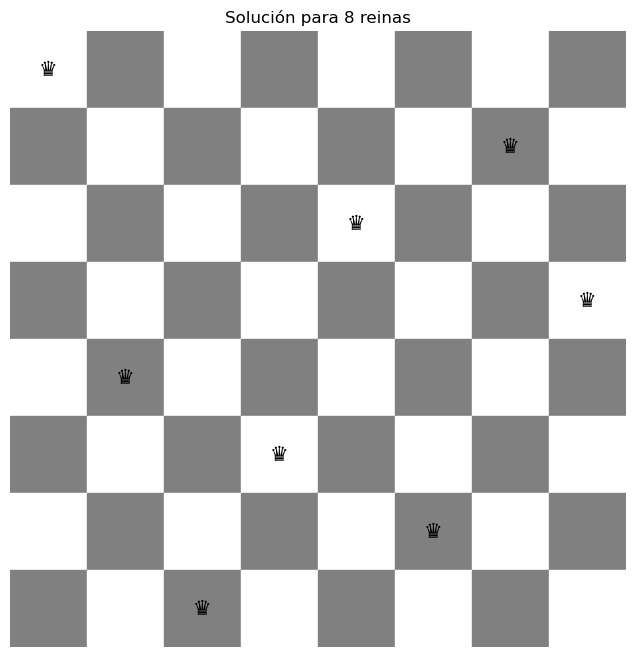

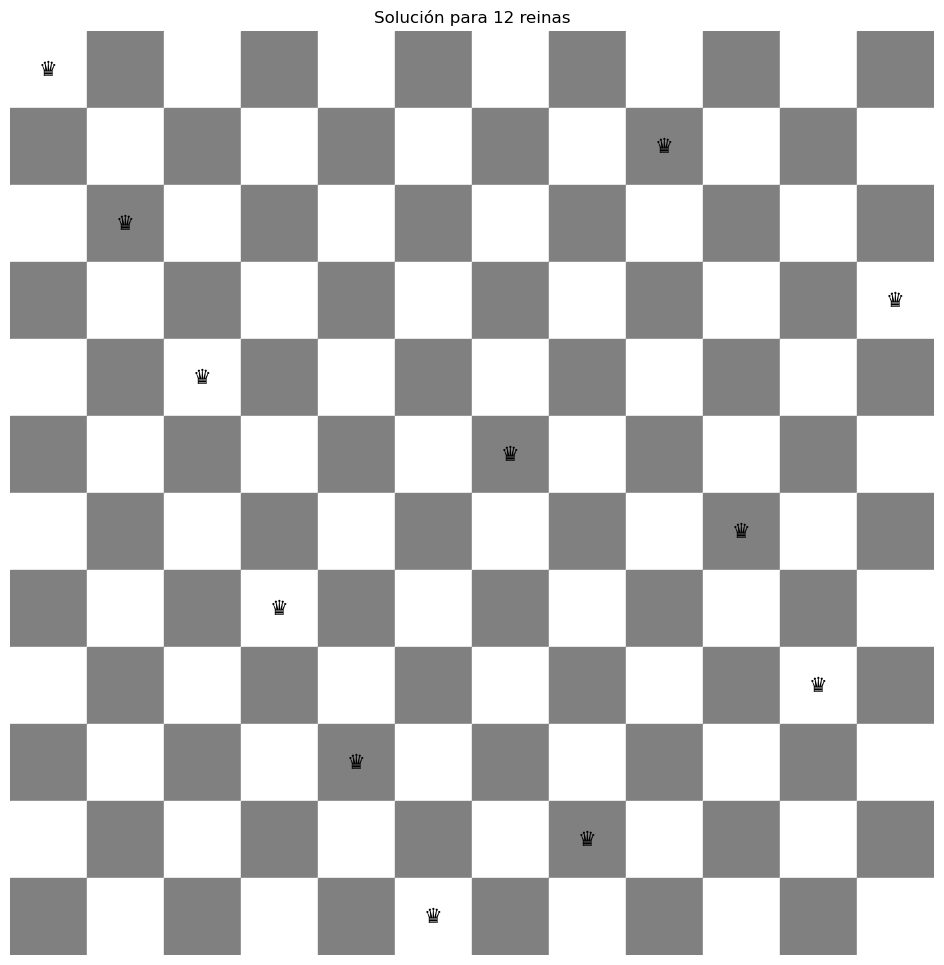

In [17]:
# Problema de las N-Reinas

# N-Reinas con vuelta atrás (Backtracking)
# Algoritmo basado en la técnica de vuelta atrás.
# Intenta colocar reinas en columnas sucesivas, retrocediendo si encuentra una posición inválida.

def is_safe(chessboard, row, col):
    for i in range(col):
        if chessboard[row][i] == 1:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if chessboard[i][j] == 1:
            return False
    for i, j in zip(range(row, len(chessboard)), range(col, -1, -1)):
        if chessboard[i][j] == 1:
            return False
    return True

def solve_nqueens(chessboard, col):
    if col >= len(chessboard):
        return True
    for i in range(len(chessboard)):
        if is_safe(chessboard, i, col):
            chessboard[i][col] = 1
            if solve_nqueens(chessboard, col + 1):
                return True
            chessboard[i][col] = 0
    return False

# Visualización gráfica del tablero de N-Reinas.
def nqueens_visualizer(size):
    chessboard = [[0] * size for _ in range(size)]
    if not solve_nqueens(chessboard, 0):
        print("No hay solución")
        return

    plt.figure(figsize=(size, size))
    for i in range(size):
        for j in range(size):
            color = "white" if (i + j) % 2 == 0 else "gray"
            plt.gca().add_patch(plt.Rectangle((j, size - i - 1), 1, 1, color=color))
            if chessboard[i][j] == 1:
                plt.text(j + 0.5, size - i - 0.5, "♛", ha="center", va="center", fontsize=15, color="black")

    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.gca().set_aspect("equal")
    plt.axis("off")
    plt.title(f"Solución para {size} reinas")
    plt.show()

# Pruebas para N-Reinas
nqueens_visualizer(8)
nqueens_visualizer(12)
